In [174]:
import warnings
warnings.simplefilter(action='ignore')

In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [176]:
wine = pd.read_csv(r'data/winemag-data-130k-v2.csv')

In [177]:
wine.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [178]:
wine.shape

(129971, 14)

In [179]:
wine.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


1) Points - значення від 80 до 100. Маленьке значення std свідчить про зовсім незначний розкид між значеннями

2) Price - від 4 до 3300 (маємо доволі велику різницю), при чому 50% = 25, а 75% = 42. Також велике значення std свідчить про значний розкид цін

In [180]:
wine.isnull().values.any()

True

У нас є пропущенні значення, тому будемо більш детально на них дивитись

<AxesSubplot:>

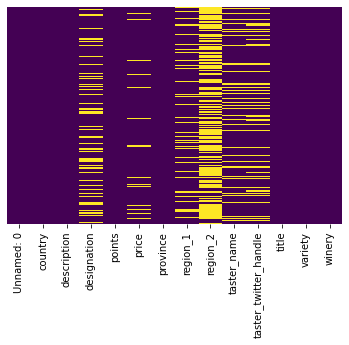

In [181]:
sns.heatmap(wine.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [182]:
print(f"Missing values in 'designation': {wine['designation'].isnull().sum()}")

Missing values in 'designation': 37465


In [183]:
wine['designation'] = wine['designation'].fillna('Unknown')

In [184]:
designation_counts = wine['designation'].value_counts().to_dict()
wine['designation_encoded'] = wine['designation'].map(designation_counts)

Correlation matrix:
                      designation_encoded    points
designation_encoded             1.000000 -0.153772
points                         -0.153772  1.000000


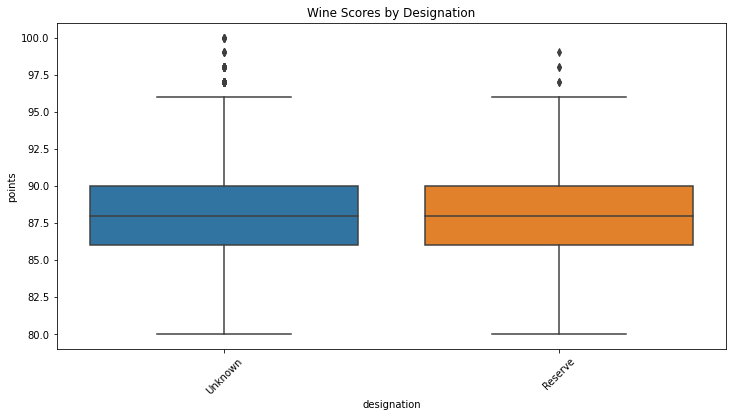

In [185]:
correlation = wine[['designation_encoded', 'points']].corr()
print("Correlation matrix:\n", correlation)

plt.figure(figsize=(12, 6))
sns.boxplot(x='designation', y='points', data=wine[wine['designation'].isin(['Reserve', 'Unknown', 'Other'])])
plt.xticks(rotation=45)
plt.title('Wine Scores by Designation')
plt.show()

Ми можемо знехтувати деякими колонками, бо вони не грають важливої ролі для вирішення поставленої задачі

<AxesSubplot:>

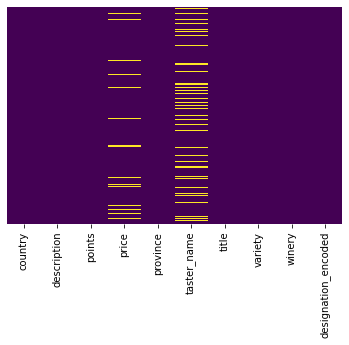

In [186]:
wine = wine.drop(columns=['Unnamed: 0','region_1','region_2','taster_twitter_handle', 'designation'])
wine1 = wine
sns.heatmap(wine.isnull(),yticklabels=False,cbar=False,cmap='viridis')

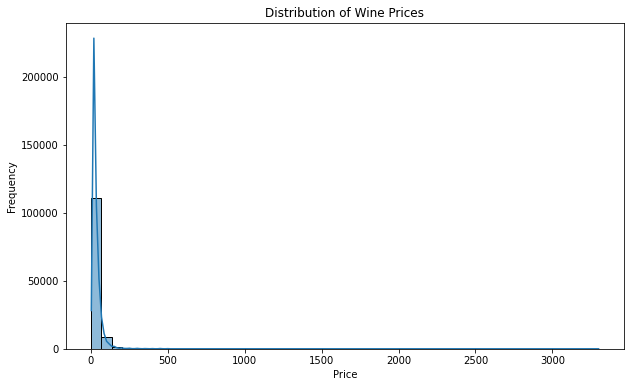

In [187]:
plt.figure(figsize=(10, 6))
sns.histplot(wine1['price'], bins=50, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Prices')
plt.show()

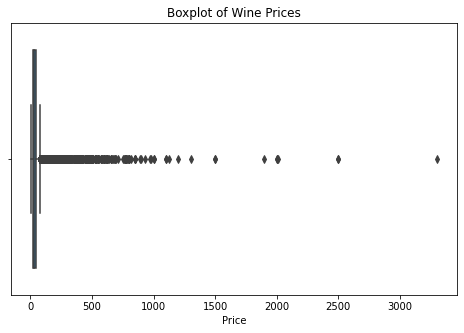

In [188]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=wine1['price'])
plt.xlabel('Price')
plt.title('Boxplot of Wine Prices')
plt.show()

In [189]:
Q1 = wine1['price'].quantile(0.25)
Q3 = wine1['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

wine_filtered = wine1[(wine1['price'] >= lower_bound) & (wine1['price'] <= upper_bound)]

print(f"Original dataset size: {wine1.shape[0]}")
print(f"Filtered dataset size: {wine_filtered.shape[0]} (outliers removed: {wine1.shape[0] - wine_filtered.shape[0]})")

Original dataset size: 129971
Filtered dataset size: 113734 (outliers removed: 16237)


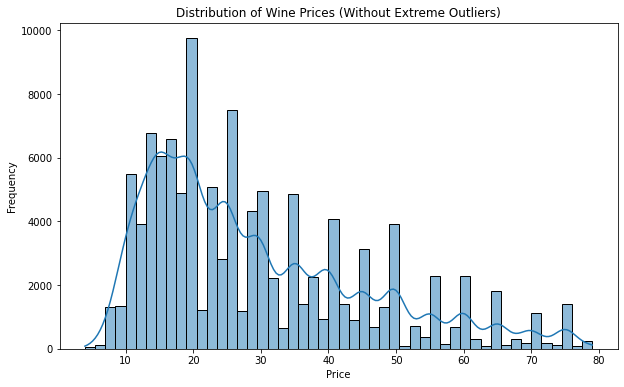

In [190]:
plt.figure(figsize=(10, 6))
sns.histplot(wine_filtered['price'], bins=50, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Prices (Without Extreme Outliers)')
plt.show()

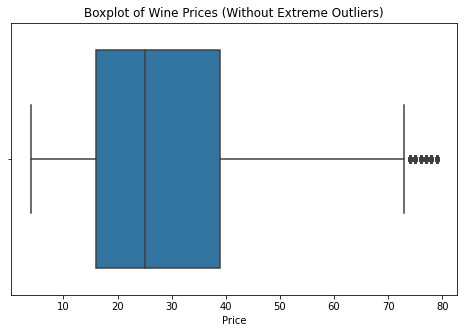

In [191]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=wine_filtered['price'])
plt.xlabel('Price')
plt.title('Boxplot of Wine Prices (Without Extreme Outliers)')
plt.show()

In [192]:
missing_values = wine1['price'].isnull().sum()

print(f"Number of missing values in 'price': {missing_values}")

Number of missing values in 'price': 8996


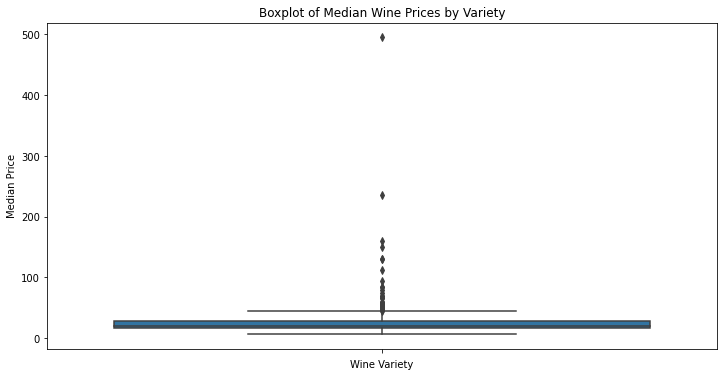

In [193]:
variety_price = wine1.groupby('variety')['price'].median().reset_index()
variety_price.columns = ['variety', 'median_price']

# Sort values for better visualization
variety_price = variety_price.sort_values(by="median_price", ascending=False)

# Create a boxplot to analyze the distribution of median prices by variety
plt.figure(figsize=(12, 6))
sns.boxplot(data=variety_price, y="median_price")
plt.title("Boxplot of Median Wine Prices by Variety")
plt.ylabel("Median Price")
plt.xlabel("Wine Variety")
plt.xticks(rotation=90)  # Rotate labels for better readability

plt.show()

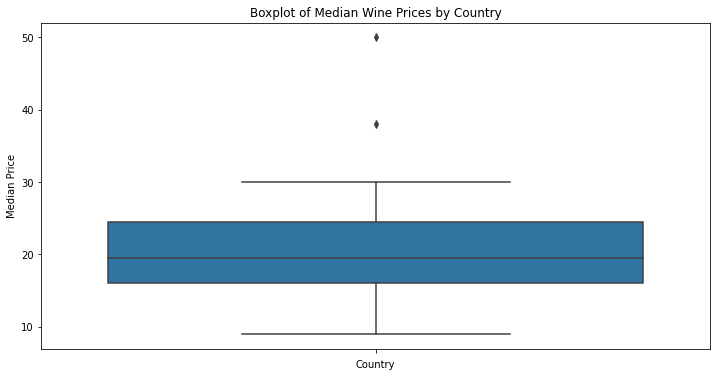

In [194]:
country_price = wine1.groupby('country')['price'].median().reset_index()
country_price.columns = ['country', 'median_price']

# Sort values for better visualization
country_price = country_price.sort_values(by="median_price", ascending=False)

# Create a boxplot to analyze the distribution of median prices by country
plt.figure(figsize=(12, 6))
sns.boxplot(data=country_price, y="median_price")
plt.title("Boxplot of Median Wine Prices by Country")
plt.ylabel("Median Price")
plt.xlabel("Country")
plt.xticks(rotation=90)  # Rotate labels for better readability

plt.show()

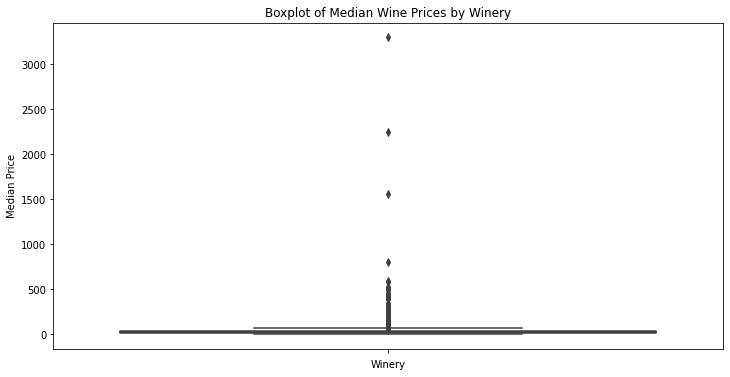

In [195]:
winery_price = wine1.groupby('winery')['price'].median().reset_index()
winery_price.columns = ['winery', 'median_price']

# Sort values for better visualization
winery_price = winery_price.sort_values(by="median_price", ascending=False)

# Create a boxplot to analyze the distribution of median prices by winery
plt.figure(figsize=(12, 6))
sns.boxplot(data=winery_price, y="median_price")
plt.title("Boxplot of Median Wine Prices by Winery")
plt.ylabel("Median Price")
plt.xlabel("Winery")
plt.xticks(rotation=90)  # Rotate labels for better readability

plt.show()

Графік медіанних цін для різних сортів винограду показує чіткі відмінності в цінах. Деякі сорти постійно дешевші, тоді як інші дорожчі, що робить сорт винограду сильним індикатором ціни. Використання країни як індикатора призвело б до надмірного спрощення та ігнорування цінових відмінностей між типами вин.

In [196]:
# Count valid prices per variety
valid_prices_per_variety = wine1.groupby('variety')['price'].count()

# Find varieties where all prices are NaN
missing_varieties = valid_prices_per_variety[valid_prices_per_variety == 0].index

# Display varieties with missing prices
print(f"Varieties with only missing prices: {list(missing_varieties)}")
print(f"Total varieties with missing prices: {len(missing_varieties)}")

Varieties with only missing prices: ['Bacchus', 'Biancu Gentile', 'Ekigaïna', 'Espadeiro', 'Petit Meslier', 'Roscetto', 'Sauvignon Blanc-Sauvignon Gris', 'Tempranillo-Malbec', 'Vital', 'Zelen']
Total varieties with missing prices: 10


In [197]:
#Fill Missing Prices Using Variety Median ###
wine1['price'] = wine1.groupby('variety')['price'].transform(lambda x: x.fillna(x.median()))

#Fill Remaining Missing Prices Using Country Median ###
wine1['price'] = wine1.groupby('country')['price'].transform(lambda x: x.fillna(x.median()))

#Drop Rows Where Median Couldn't Be Determined ###
wine1 = wine1.dropna(subset=['price'])

print(f"Missing values in 'price' after cleaning: {wine1['price'].isnull().sum()}")
print(f"Final dataset shape: {wine1.shape}")

Missing values in 'price' after cleaning: 0
Final dataset shape: (129908, 10)


<AxesSubplot:>

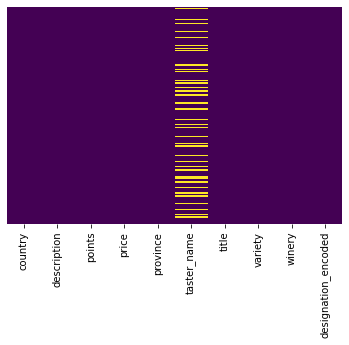

In [198]:
sns.heatmap(wine1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

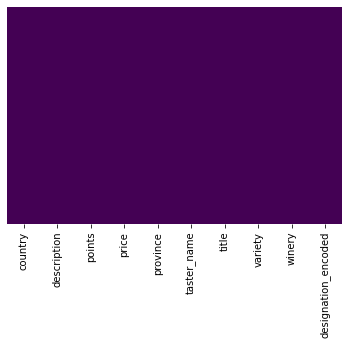

In [199]:
wine1['taster_name'].fillna("Unknown", inplace=True)
sns.heatmap(wine1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

На цьому ми змогли прибрати всі пропущені значення в нашому датасеті

In [200]:
# Removing duplicates
unique_wine = wine1.drop_duplicates()
unique_wine.shape

(119929, 10)

Видалили дублікати

<AxesSubplot:xlabel='price'>

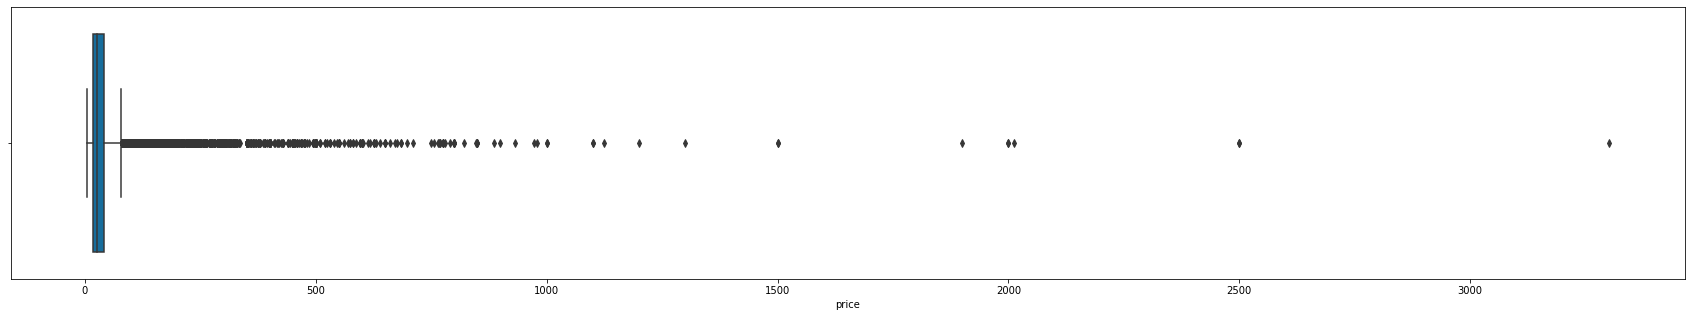

In [201]:
plt.figure(figsize=(30,5))
sns.boxplot(x=unique_wine['price'],palette = 'colorblind')

Маємо доволі багато критично великих значень. З цим треба попрацювати

<AxesSubplot:xlabel='points'>

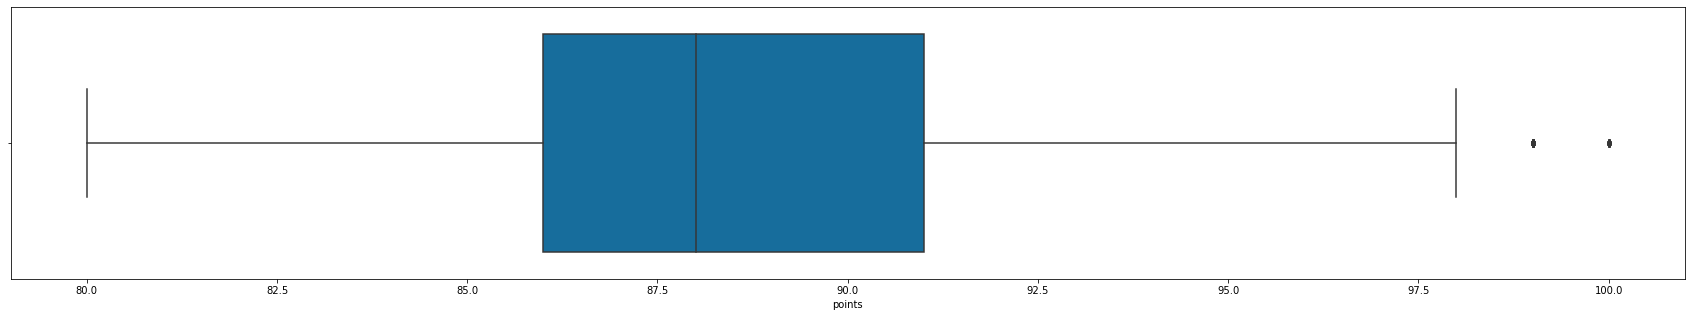

In [202]:
plt.figure(figsize=(30,5))
sns.boxplot(x=unique_wine['points'],palette = 'colorblind')

Так як high value значень не багато, ми їх залишимо. 

In [203]:
percentile_95 = unique_wine['price'].quantile(0.95)  # 95th percentile
percentile_99 = unique_wine['price'].quantile(0.99)  # 99th percentile

print(f"95th percentile price: ${percentile_95:.2f}")
print(f"99th percentile price: ${percentile_99:.2f}")

95th percentile price: $82.00
99th percentile price: $150.00


Доречно всі більше 150 по ціні виділити в окрему ціну, щоб не втрачати дані

In [204]:
unique_wine.head(10)

,country,description,points,price,province,taster_name,title,variety,winery,designation_encoded
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,19.0,Sicily & Sardinia,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,1
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,37465
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,8
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,1
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,1
6,Italy,"Here's a bright, informal red that opens with ...",87,16.0,Sicily & Sardinia,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,3
7,France,This dry and restrained wine offers spice in p...,87,24.0,Alsace,Roger Voss,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,37465
8,Germany,Savory dried thyme notes accent sunnier flavor...,87,12.0,Rheinhessen,Anna Lee C. Iijima,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,6
9,France,This has great depth of flavor with its fresh ...,87,27.0,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,16
